In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# dataScipy is my own library for data science, you can install it by writing "pip install dataScipy" in your terminal
# let me know if you have any issues with it, baktas19@ku.edu.tr
from dataScipy import DataScience as DS
# IMPORTANT:
# for the sake of this homework, please use the version 0.0.4.0.2 of dataScipy
# pip install dataScipy==0.0.4.0.2

### <span style="color:RED">QUESTION 1</span>

In [2]:
TEA = pd.read_csv('KenyanTeaPrice.csv', skiprows=1)
MONTH = list(TEA['Month'].values)
PRICES = list(TEA['Index'].values)

## indexing
ERROR_START = 12 # beginnging of the 2014 January
ERROR_END = 108 # end of the 2021 December

TEST_START = 108 # beginnging of the 2022 January

### <span style="color:RED">1.a</span>

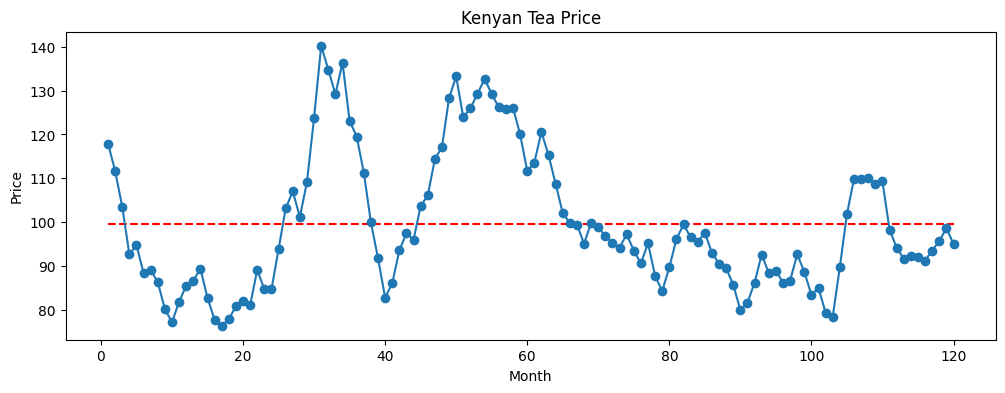

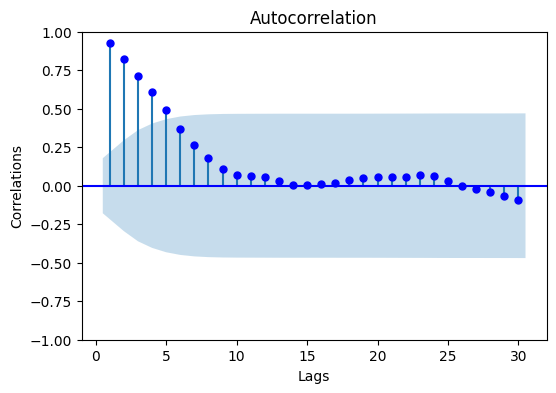

In [3]:
plt.figure(figsize=(12, 4))

plt.hlines(y = np.mean(PRICES), xmin = np.min(MONTH), xmax = np.max(MONTH), color = 'red', linestyles = 'dashed')
plt.plot(MONTH, PRICES, 'o-')

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Kenyan Tea Price')
plt.show()

DS.plot_autocorrelation(PRICES, no_lags=30)

### <span style="color:RED">1.b</span>

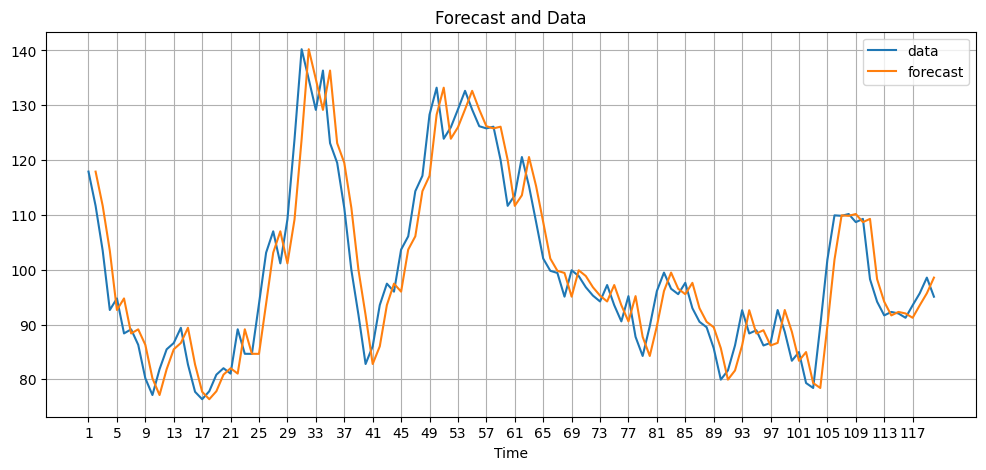

Starting from 2014 January, to the end of 2021 December
Error Summary
-------------
MAE: 4.7206
MAPE: 4.6456
MSE: 34.0388
RMSE: 5.8343


In [4]:
NAIVE_FORECAST = DS.make_forecast_for_all_data(PRICES, DS.naive_forecast)

DS.plot_forecasts(PRICES, MONTH, NAIVE_FORECAST, time_step=4)

print("Starting from 2014 January, to the end of 2021 December")
DS.print_error_summary(PRICES[ERROR_START:ERROR_END], NAIVE_FORECAST[ERROR_START:ERROR_END], MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

### <span style="color:RED">1.c</span>

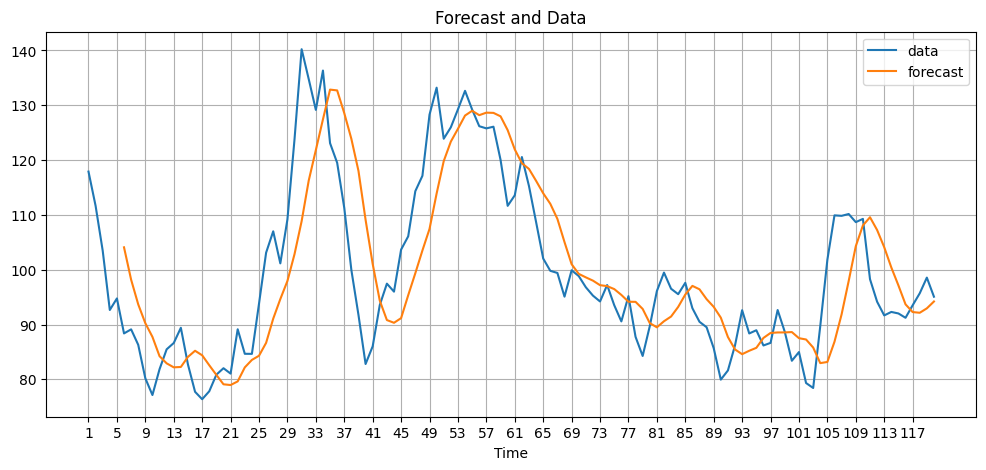

Starting from 2014 January, to the end of 2021 December
Error Summary
-------------
MAE: 7.9806
MAPE: 7.8060
MSE: 110.0070
RMSE: 10.4884


In [5]:
MA5_FORECAST = DS.make_forecast_for_all_data(PRICES, DS.MA_forecast, N=5)

DS.plot_forecasts(PRICES, MONTH, MA5_FORECAST, time_step=4)

print("Starting from 2014 January, to the end of 2021 December")
DS.print_error_summary(PRICES[ERROR_START:ERROR_END], MA5_FORECAST[ERROR_START:ERROR_END], MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

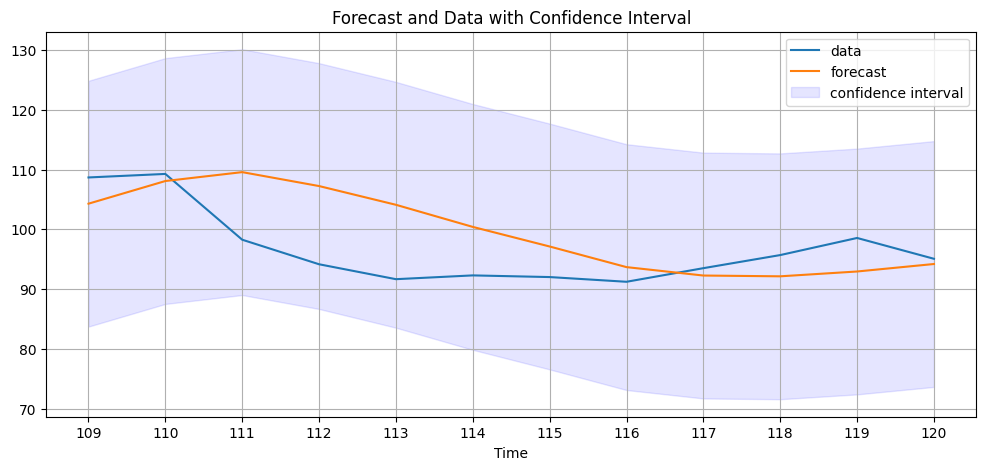

In [6]:
MA5_FORECAST_RMSE = DS.RMSE(PRICES[ERROR_START:ERROR_END], MA5_FORECAST[ERROR_START:ERROR_END])
DS.plot_forecasts_predictIntervals(PRICES[TEST_START:], MONTH[TEST_START:], MA5_FORECAST[TEST_START:], MA5_FORECAST_RMSE, percent=0.95, time_step=1)

### <span style="color:RED">1.d</span>

In [7]:
ALPHA_VALUES = np.arange(0.00, 1.01, 0.1)

## Get the forecasts for all the alpha values
ES_FORECASTS = {}
for alpha in ALPHA_VALUES:
    ES_FORECASTS["ES({:.2f})".format(alpha)] = DS.make_forecast_for_all_data(PRICES, DS.ES_forecast, alpha=alpha)

## Rearrange the forecasts for the error calculation
ES_FORECASTS_FOR_ERRORS = {}
for alpha in ALPHA_VALUES:
    ES_FORECASTS_FOR_ERRORS["ES({:.2f})".format(alpha)] = ES_FORECASTS["ES({:.2f})".format(alpha)][ERROR_START:ERROR_END]

## Calculate the errors for all the alpha values and store them in a dataframe
ES_FORECASTS_ERRORS_DF = DS.compare_forecasts(PRICES[ERROR_START:ERROR_END], ES_FORECASTS_FOR_ERRORS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

## Find the alpha value with the minimum RMSE
MIN_RMSE_ES_FORECAST_DF = ES_FORECASTS_ERRORS_DF[ES_FORECASTS_ERRORS_DF['MSE'] == ES_FORECASTS_ERRORS_DF['MSE'].min()]
ES_FORECASTS_ERRORS_DF

,MAE,MAPE,MSE,RMSE
ES(0.00),21.11,23.03,565.98,23.79
ES(0.10),10.98,10.73,183.13,13.53
ES(0.20),8.54,8.27,126.42,11.24
ES(0.30),7.27,7.07,93.92,9.69
ES(0.40),6.44,6.30,73.26,8.56
ES(0.50),5.91,5.79,59.71,7.73
ES(0.60),5.52,5.41,50.57,7.11
ES(0.70),5.19,5.10,44.23,6.65
ES(0.80),4.97,4.89,39.71,6.30
ES(0.90),4.85,4.77,36.43,6.04


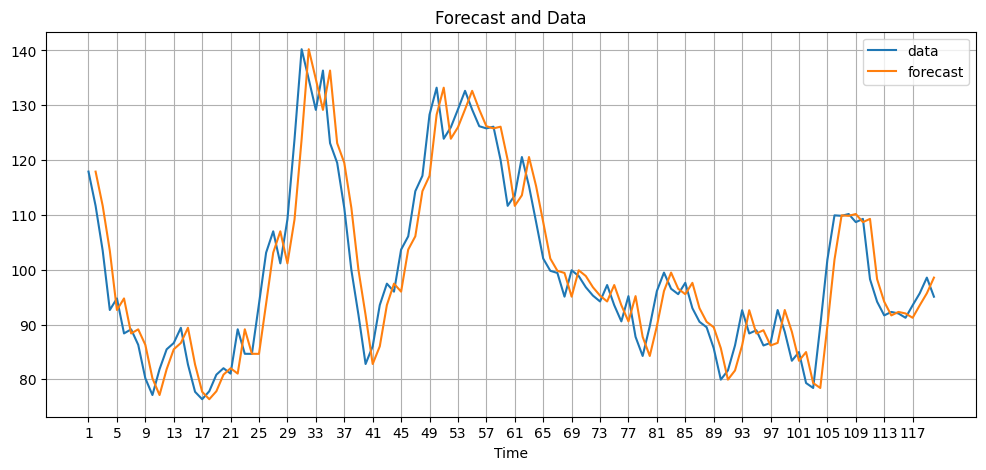

Starting from 2014 January, to the end of 2021 December
Error Summary
-------------
MAE: 4.7206
MAPE: 4.6456
MSE: 34.0388
RMSE: 5.8343


In [8]:
BEST_ES_FORECAST = ES_FORECASTS[MIN_RMSE_ES_FORECAST_DF.index[0]]
DS.plot_forecasts(PRICES, MONTH, BEST_ES_FORECAST, time_step=4)

print("Starting from 2014 January, to the end of 2021 December")
DS.print_error_summary(PRICES[ERROR_START:ERROR_END], BEST_ES_FORECAST[ERROR_START:ERROR_END], MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

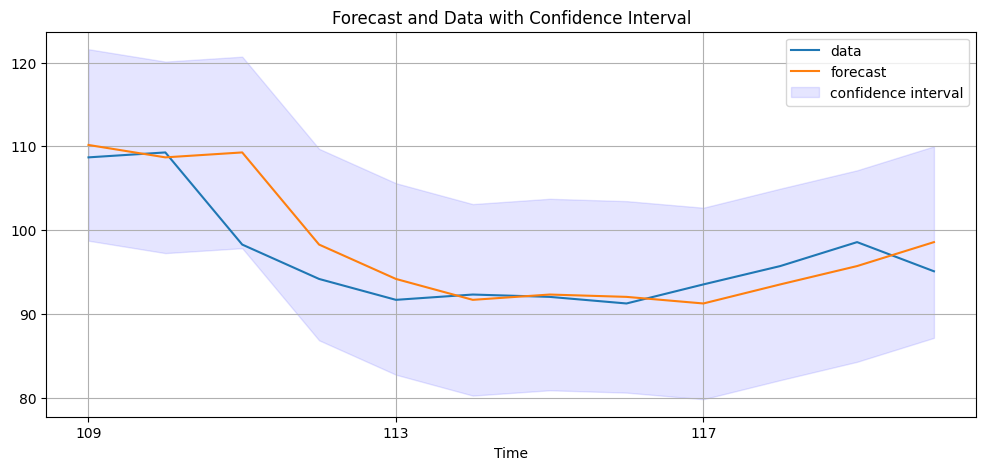

In [9]:
BEST_ES_FORECAST_RMSE = DS.RMSE(PRICES[ERROR_START:ERROR_END], BEST_ES_FORECAST[ERROR_START:ERROR_END])
DS.plot_forecasts_predictIntervals(PRICES[TEST_START:], MONTH[TEST_START:], BEST_ES_FORECAST[TEST_START:], BEST_ES_FORECAST_RMSE, percent=0.95, time_step=4)

### <span style="color:RED">1.e</span>

In [10]:
def short_term_trend_forecast(data):
    """
    This function takes in a list of data and returns a list of forecasts
    for the next N periods based on a short-term trend forecast.
    """

    if len(data) < 3:
        return None

    return data[-1] + (data[-2] - data[-3])

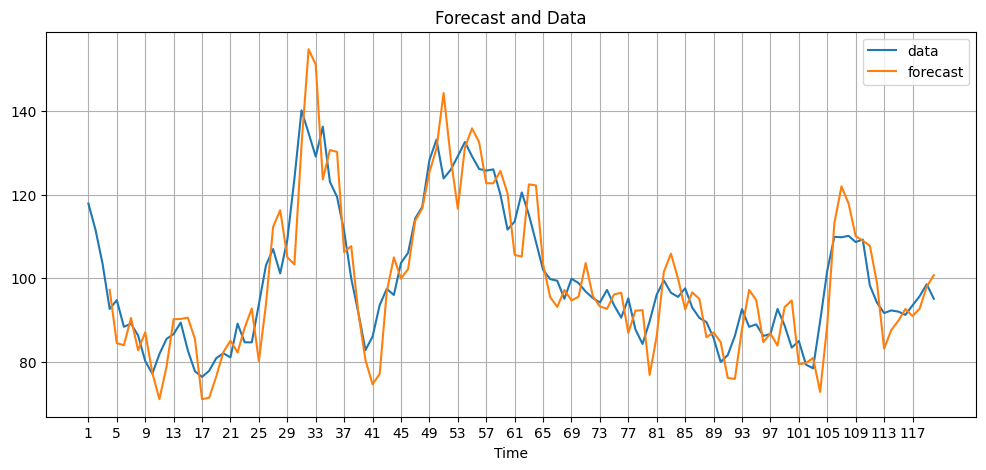

Starting from 2014 January, to the end of 2021 December
Error Summary
-------------
MAE: 6.6557
MAPE: 6.5670
MSE: 69.0194
RMSE: 8.3078


In [11]:
STT_FORECAST = DS.make_forecast_for_all_data(PRICES, short_term_trend_forecast)

DS.plot_forecasts(PRICES, MONTH, STT_FORECAST, time_step=4)

print("Starting from 2014 January, to the end of 2021 December")
DS.print_error_summary(PRICES[ERROR_START:ERROR_END], STT_FORECAST[ERROR_START:ERROR_END], MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

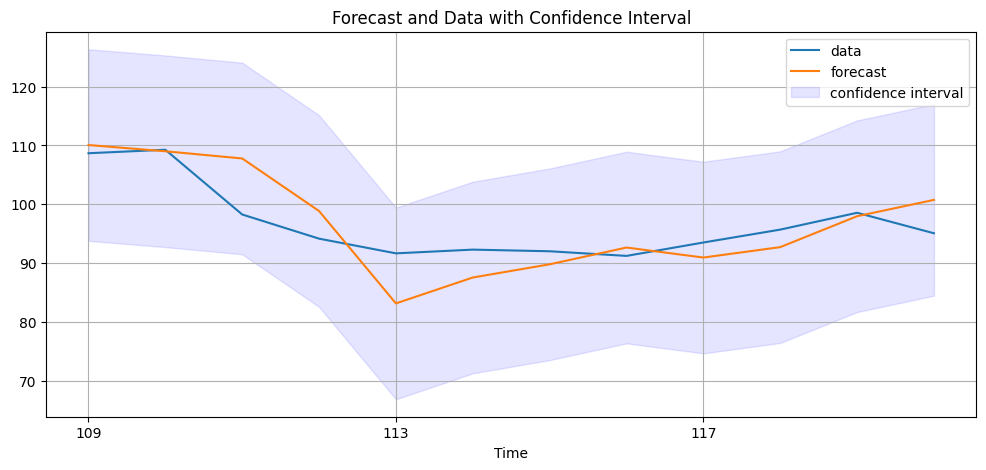

In [12]:
STT_FORECAST_RMSE = DS.RMSE(PRICES[ERROR_START:ERROR_END], STT_FORECAST[ERROR_START:ERROR_END])
DS.plot_forecasts_predictIntervals(PRICES[TEST_START:], MONTH[TEST_START:], STT_FORECAST[TEST_START:], STT_FORECAST_RMSE, percent=0.95, time_step=4)

### <span style="color:RED">1.f</span>

In [13]:
def DES_level(data, alpha, forecasts, step_ahead):
    """
    This function returns the level of a double exponential smoothing forecast.
    """

    if len(data) == 1:
        return data[0]

    else:
        return alpha * data[-1] + (1 - alpha) * forecasts[-step_ahead]



In [14]:
def DES_trend(data, beta, forecasts, step_ahead):

    if len(data) == 1:
        return 0

    else:
        return beta * (data[-1] - data[-2]) + (1 - beta) * (forecasts[-step_ahead] - forecasts[-step_ahead - 1])

In [15]:
def DES_forecast(data, alpha, beta, step_ahead, forecasts):
    """
    This function make a double exponential smoothing forecast 
    :param data: a list of data values
    :param alpha: smoothing parameter for level
    :param beta: smoothing parameter for trend
    :param h: steps ahead to forecast
    :return: a list of forecasts for the next h periods
    """

    level_component = DES_level(data, alpha, forecasts, step_ahead)
    trend_component = DES_trend(data, beta, forecasts, step_ahead)

    return level_component + trend_component * step_ahead

In [16]:
def make_DES_forecasts(data, alpha, beta, step_ahead=1):
    """
    This function takes in a list of data and returns a list of forecasts
    for the next k periods based on a double exponential smoothing forecast.
    """

    forecasts = data[0:step_ahead]
    
    for i in range(1, len(data)):
        forecasts.append(DES_forecast(data[:i], alpha, beta, step_ahead, forecasts))

    return forecasts

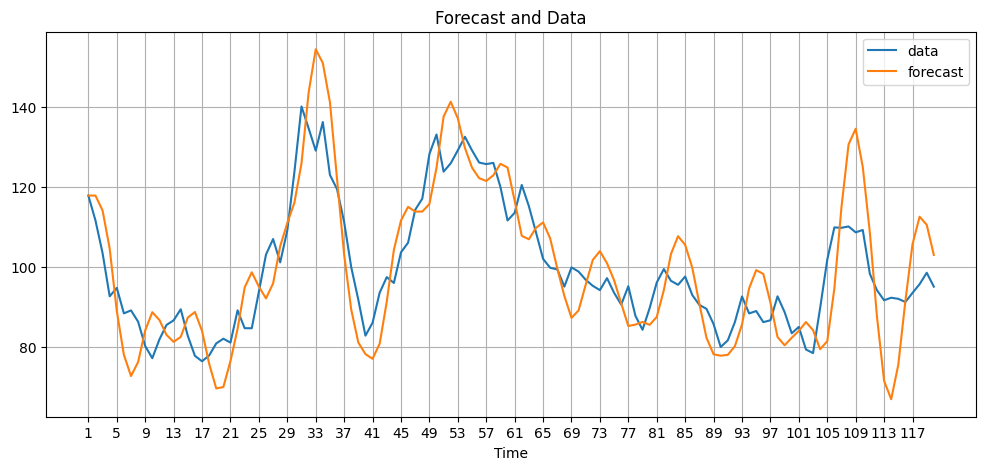

Starting from 2014 January, to the end of 2021 December
Error Summary
-------------
MAE: 7.6196
MAPE: 7.5679
MSE: 81.7857
RMSE: 9.0435


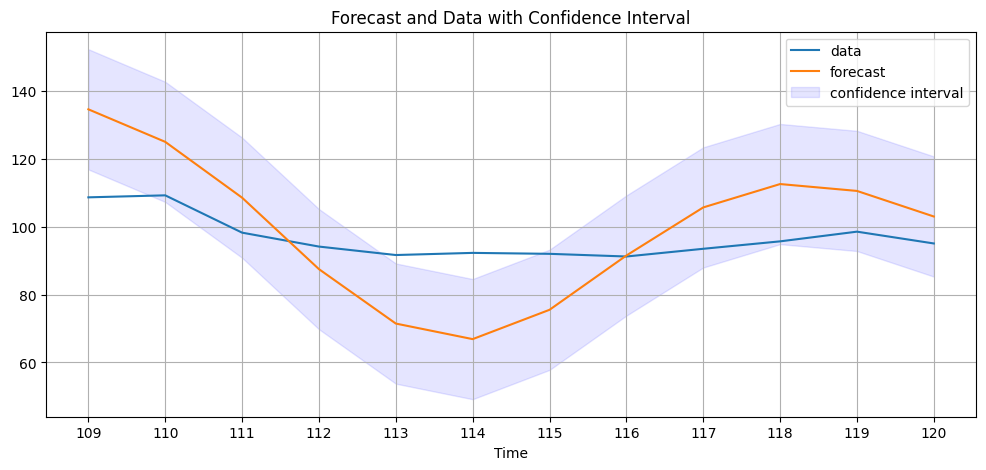

In [17]:
DES1_FORECASTS = make_DES_forecasts(PRICES, 0.5, 0.1, step_ahead=1)

DS.plot_forecasts(PRICES, MONTH, DES1_FORECASTS, time_step=4)
print("Starting from 2014 January, to the end of 2021 December")
DS.print_error_summary(PRICES[ERROR_START:ERROR_END], DES1_FORECASTS[ERROR_START:ERROR_END], MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

DES1_FORECAST_RMSE = DS.RMSE(PRICES[ERROR_START:ERROR_END], DES1_FORECASTS[ERROR_START:ERROR_END])
DS.plot_forecasts_predictIntervals(PRICES[TEST_START:], MONTH[TEST_START:], DES1_FORECASTS[TEST_START:], DES1_FORECAST_RMSE, percent=0.95, time_step=1)

### <span style="color:RED">1.g</span>

In [18]:
ALPHA_VALUES = np.arange(0.01, 1.01, 0.01)
BETA_VALUES = np.arange(0.01, 1.01, 0.01)

DOUBLE_ES_FORECASTS = {}
for alpha in ALPHA_VALUES:
    for beta in BETA_VALUES:
        DOUBLE_ES_FORECASTS["DES({:.2f}, {:.2f})".format(alpha, beta)] = make_DES_forecasts(PRICES, alpha, beta, step_ahead=6)


DES_FORECASTS_FOR_ERRORS = {}
for alpha in ALPHA_VALUES:
    for beta in BETA_VALUES:
        DES_FORECASTS_FOR_ERRORS["DES({:.2f}, {:.2f})".format(alpha, beta)] = DOUBLE_ES_FORECASTS["DES({:.2f}, {:.2f})".format(alpha, beta)][ERROR_START:ERROR_END]
    

DES_FORECASTS_ERRORS_DF = DS.compare_forecasts(PRICES[ERROR_START:ERROR_END], DES_FORECASTS_FOR_ERRORS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

MIN_RMSE_DES_FORECAST_DF = DES_FORECASTS_ERRORS_DF[DES_FORECASTS_ERRORS_DF['RMSE'] == DES_FORECASTS_ERRORS_DF['RMSE'].min()]
MIN_RMSE_DES_FORECAST_DF

,MAE,MAPE,MSE,RMSE
"DES(0.79, 1.00)",27.84,27.75,1268.19,35.61


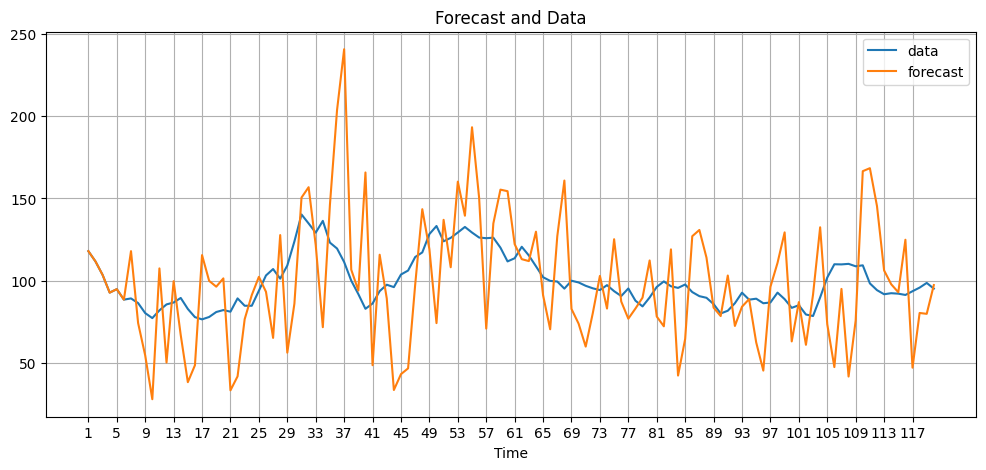

Starting from 2014 January, to the end of 2021 December
Error Summary
-------------
MAE: 27.8403
MAPE: 27.7536
MSE: 1268.1855
RMSE: 35.6116


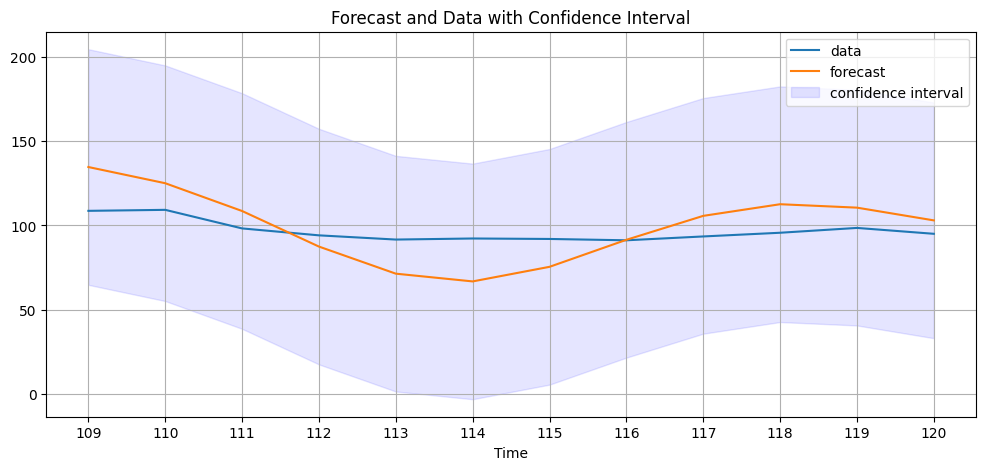

In [19]:
BEST_DES6_FORECAST = DOUBLE_ES_FORECASTS[MIN_RMSE_DES_FORECAST_DF.index[0]]
DS.plot_forecasts(PRICES, MONTH, BEST_DES6_FORECAST, time_step=4)
print("Starting from 2014 January, to the end of 2021 December")
DS.print_error_summary(PRICES[ERROR_START:ERROR_END], BEST_DES6_FORECAST[ERROR_START:ERROR_END], MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

DES6_FORECAST_RMSE = DS.RMSE(PRICES[ERROR_START:ERROR_END], BEST_DES6_FORECAST[ERROR_START:ERROR_END])
DS.plot_forecasts_predictIntervals(PRICES[TEST_START:], MONTH[TEST_START:], DES1_FORECASTS[TEST_START:], DES6_FORECAST_RMSE, percent=0.95, time_step=1)

In [20]:
len(BEST_DES6_FORECAST)

125

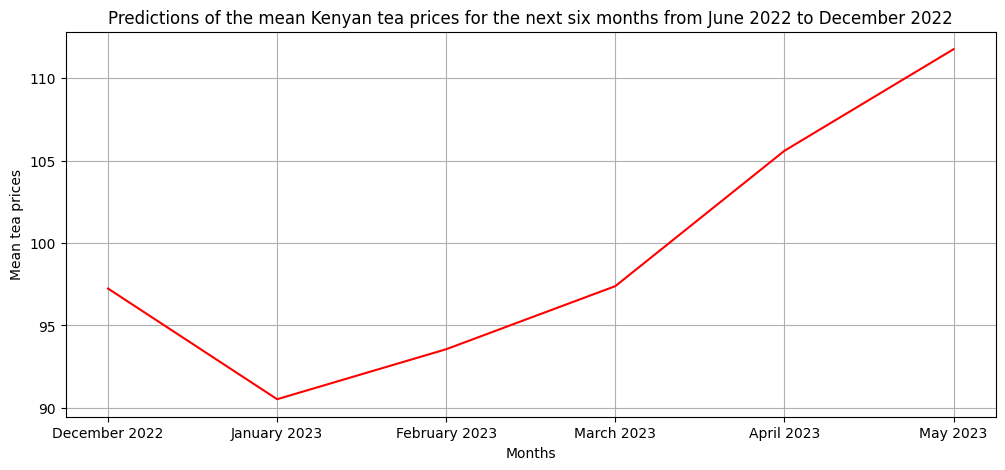

Predictions of the mean Kenyan tea prices for the next six months from June 2022 to December 2022:
December 2022:  97.24165705112648
January 2023:  90.52487932383033
February 2023:  93.56023098225086
March 2023:  97.38894071662317
April 2023:  105.60305020359908
May 2023:  111.76893878086993


In [21]:
print()

plt.figure(figsize=(12, 5))
plt.plot([121, 122, 123, 124, 125, 126], BEST_DES6_FORECAST[119:], color='red', label='Predicted mean tea prices')
plt.title("Predictions of the mean Kenyan tea prices for the next six months from June 2022 to December 2022")
plt.xlabel("Months")
plt.ylabel("Mean tea prices")
plt.xticks([121, 122, 123, 124, 125, 126], ['December 2022', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023'])
plt.grid()
plt.show()

print("Predictions of the mean Kenyan tea prices for the next six months from June 2022 to December 2022:")
print("December 2022: ", BEST_DES6_FORECAST[119])
print("January 2023: ", BEST_DES6_FORECAST[120])
print("February 2023: ", BEST_DES6_FORECAST[121])
print("March 2023: ", BEST_DES6_FORECAST[122])
print("April 2023: ", BEST_DES6_FORECAST[123])
print("May 2023: ", BEST_DES6_FORECAST[124])

### <span style="color:RED">1.h</span>

In [22]:
ALL_FORECASTS = {
    "Naive": NAIVE_FORECAST[ERROR_START:ERROR_END],
    "MA(5)": MA5_FORECAST[ERROR_START:ERROR_END],
    "ES(1.00)": BEST_ES_FORECAST[ERROR_START:ERROR_END],
    "STT": STT_FORECAST[ERROR_START:ERROR_END],
    "DES(0.50, 0.10) - 1 month ahead": DES1_FORECASTS[ERROR_START:ERROR_END],
    "DES(0.79, 1.00) - 6 month ahead": BEST_DES6_FORECAST[ERROR_START:ERROR_END]
}

ALL_FORECASTS_COMPARISON_DF = DS.compare_forecasts(PRICES[ERROR_START:ERROR_END], ALL_FORECASTS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
ALL_FORECASTS_COMPARISON_DF

,MAE,MAPE,MSE,RMSE
Naive,4.72,4.65,34.04,5.83
MA(5),7.98,7.81,110.01,10.49
ES(1.00),4.72,4.65,34.04,5.83
STT,6.66,6.57,69.02,8.31
"DES(0.50, 0.10) - 1 month ahead",7.62,7.57,81.79,9.04
"DES(0.79, 1.00) - 6 month ahead",27.84,27.75,1268.19,35.61


### <span style="color:RED">QUESTION 2</span>

In [23]:
np.random.seed(123)
AR1_PROCESS = DS.generate_AR_process(50, [0.6], np.random.normal(0, 20, 501), 500)

### <span style="color:RED">2.a</span>

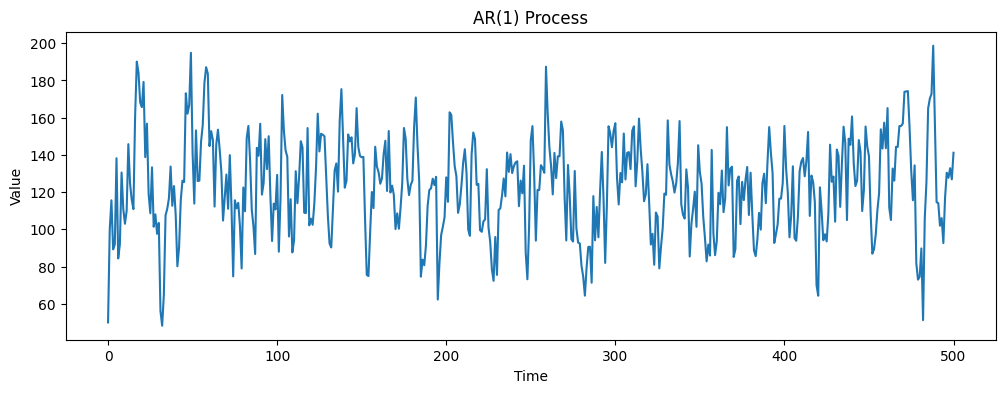

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(AR1_PROCESS)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Process')
plt.show()

### <span style="color:RED">2.b</span>

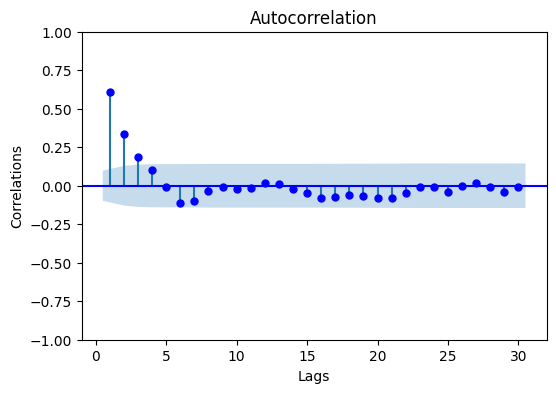

In [25]:
DS.plot_autocorrelation(AR1_PROCESS[100:], no_lags=30)

### <span style="color:RED">2.c</span>

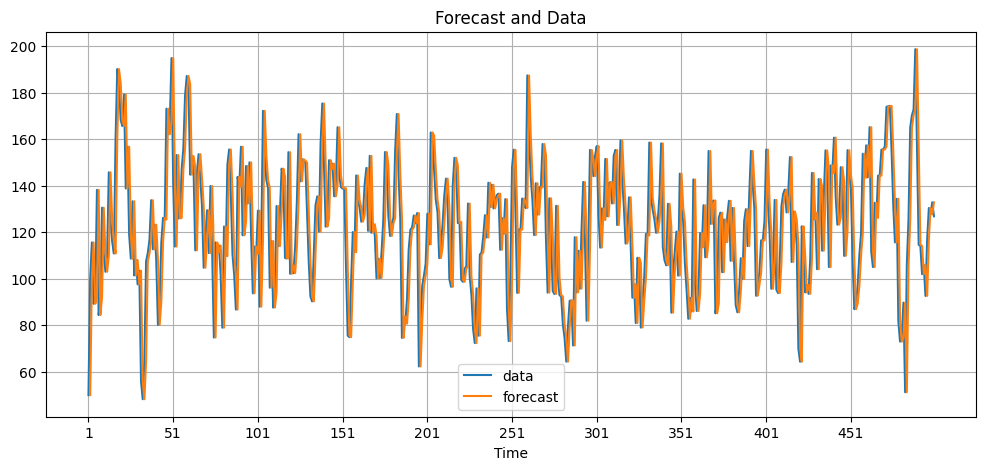

Starting from 100th period, RMSE = 21.59


In [26]:
NAIVE_FORECAST_AR1 = DS.make_forecast_for_all_data(AR1_PROCESS, DS.naive_forecast)

DS.plot_forecasts(AR1_PROCESS, list(range(1, 501)), NAIVE_FORECAST_AR1, time_step=50)

print("Starting from 100th period, RMSE = {:.2f}".format(DS.RMSE(AR1_PROCESS[100:], NAIVE_FORECAST_AR1[100:])))

### <span style="color:RED">QUESTION 3</span>

### <span style="color:RED">3.a</span>

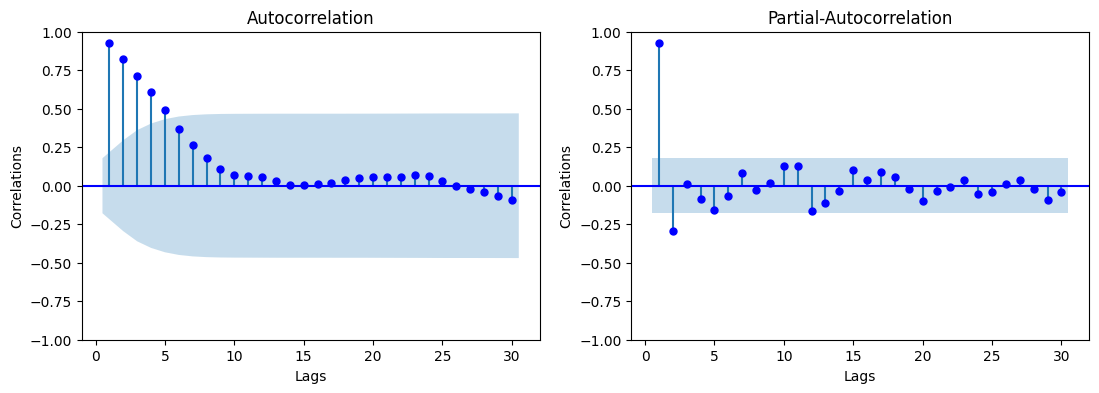

In [27]:
DS.plot_PACF_ACF_together(PRICES, no_lags=30)

### <span style="color:RED">3.b</span>

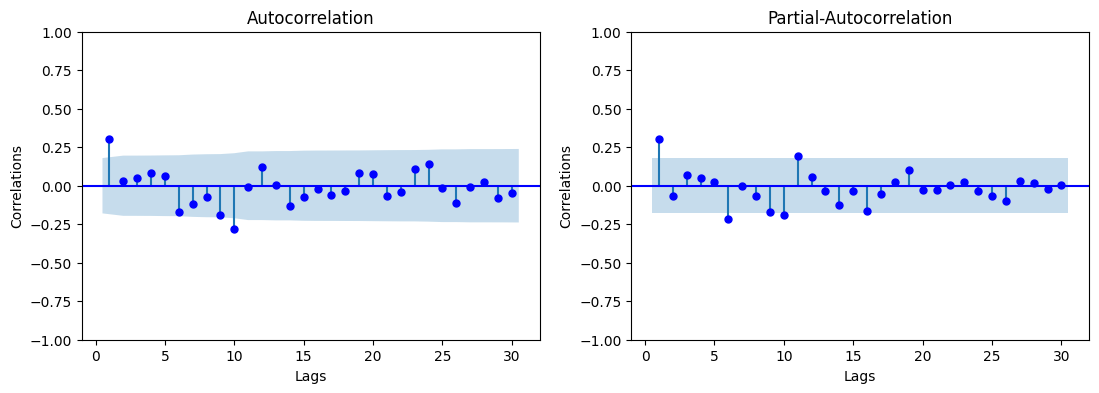

In [28]:
DIFF_PRICES = DS.take_diff_of_series(PRICES)

DS.plot_PACF_ACF_together(DIFF_PRICES, no_lags=30)